In [2]:
#This project was jointly completed by Hanwen Miao and Yue Zhou. 
#We declare that we did not use any code from the internet and did not utilize ChatGPT for completion.
import pandas as pd
#Load data
file_path = r'D:\Loandefault.csv'

In [3]:
# Trying to read file using Latin1 encoding
try:
    data = pd.read_csv(file_path, encoding='latin1')
except Exception as e:
    error_message = str(e)

In [4]:
#Check the head of data
data.head() if 'data' in locals() else error_message

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [5]:
# Data preprocessing
# Check if there are missing values
missing_values = data.isnull().sum()

#  Check if there are obvious outliers in the data by using select.dtype
negative_values_check = (data.select_dtypes(include=['float64', 'int64']) < 0).sum()
# Summary of missing and negative values
missing_values_summary = pd.DataFrame({'missing values': missing_values, 'negative values': negative_values_check})
# Display the first 10 columns 
missing_values_summary.head(10)  

,missing values,negative values
Unnamed: 0,0,0.0
addr_state,0,NaN
annual_inc,2,0.0
delinq_2yrs,1,0.0
dti,0,0.0
earliest_cr_line,0,NaN
emp_length,993,NaN
funded_amnt,1,0.0
funded_amnt_inv,1,0.0
home_ownership,0,NaN


In [6]:
# Handle missing values
# For numeric columns, we use the median of the column to fill in the missing values
# For category columns such as 'emp_length', use 'Unknown' to fill in the missing values
# Identify numeric and category columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
# Fill in missing values
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.median()), axis=0)
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Check if there are  still any missing values
remaining_missing_values = data.isnull().sum().sum()
# This value should be 0 if any missing value are handled
remaining_missing_values 

0

In [7]:
import numpy as np
# Descriptive statistical analyses(Includes only numeric columns)
descriptive_stats = data.describe(include=[np.number])

 # Transpose for a better view
descriptive_stats.transpose()  

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,38480.0,19240.500000,11108.363516,1.0,9620.750000,19240.500000,2.886025e+04,3.848000e+04
id,38480.0,664997.930016,219232.159934,1.0,498364.500000,644319.500000,8.265608e+05,1.077430e+06
member_id,38480.0,826189.854288,279353.137600,1.0,638462.000000,824254.500000,1.034706e+06,1.314167e+06
loan_amnt,38480.0,11094.692698,7405.322988,0.0,5200.000000,9750.000000,1.500000e+04,3.500000e+04
funded_amnt,38480.0,10831.824324,7146.763574,0.0,5100.000000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,38480.0,10150.098526,7127.939194,0.0,4950.000000,8495.792749,1.400000e+04,3.500000e+04
int_rate,38480.0,12.164300,3.737440,0.0,9.620000,11.990000,1.472000e+01,1.009900e+02
installment,38480.0,323.162081,209.086506,0.0,165.740000,277.980000,4.293500e+02,1.305190e+03
annual_inc,38480.0,68994.771219,64474.756234,0.0,40000.000000,58650.000000,8.200000e+04,6.000000e+06
dti,38480.0,13.378119,6.744356,0.0,8.200000,13.485000,1.869000e+01,1.000000e+02


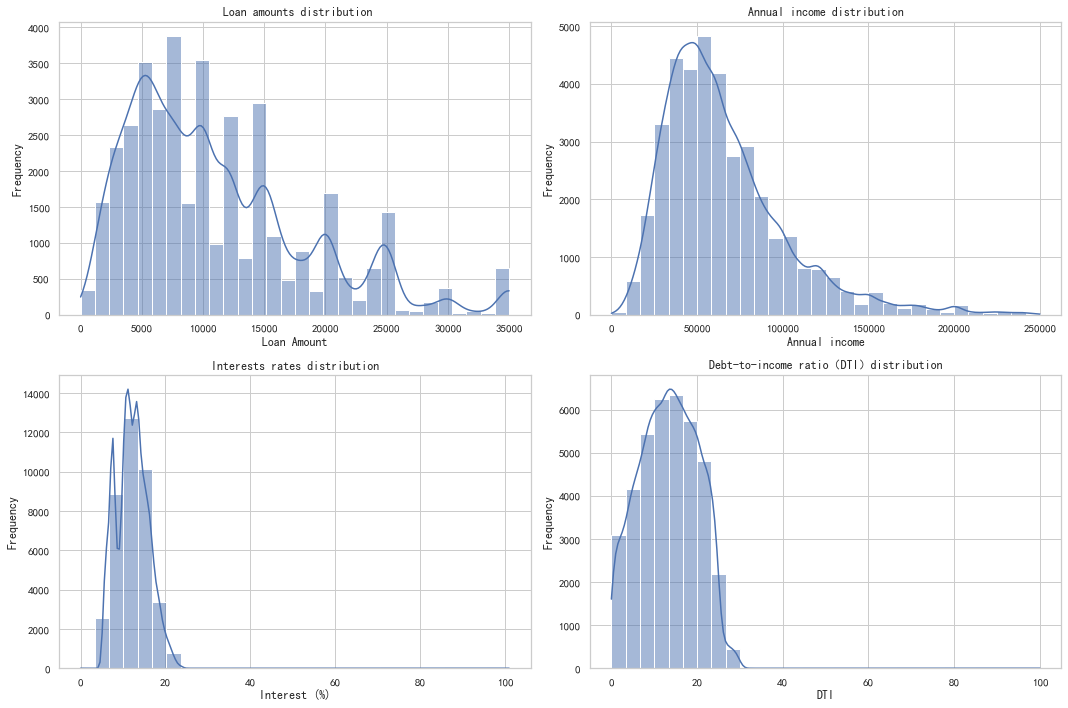

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  # Normal display of the minus sign
# Create a graph with multiple subgraphs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of Loan Amounts
sns.histplot(data['loan_amnt'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(' Loan amounts distribution')
axes[0, 0].set_xlabel('Loan Amount')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Annual Income
sns.histplot(data[data['annual_inc'] < 250000]['annual_inc'], bins=30, kde=True, ax=axes[0, 1])  # Limit to 250k for better visualisation
axes[0, 1].set_title('Annual income distribution')
axes[0, 1].set_xlabel('Annual income')
axes[0, 1].set_ylabel('Frequency')

# Distribution of interests rates
sns.histplot(data['int_rate'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Interests rates distribution')
axes[1, 0].set_xlabel('Interest (%)')
axes[1, 0].set_ylabel('Frequency')

# Debt-to-income ratio（DTI）distribution
sns.histplot(data['dti'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Debt-to-income ratio（DTI）distribution')
axes[1, 1].set_xlabel('DTI')
axes[1, 1].set_ylabel('Frequency')

# Adjustment of the layout
plt.tight_layout()
plt.show()


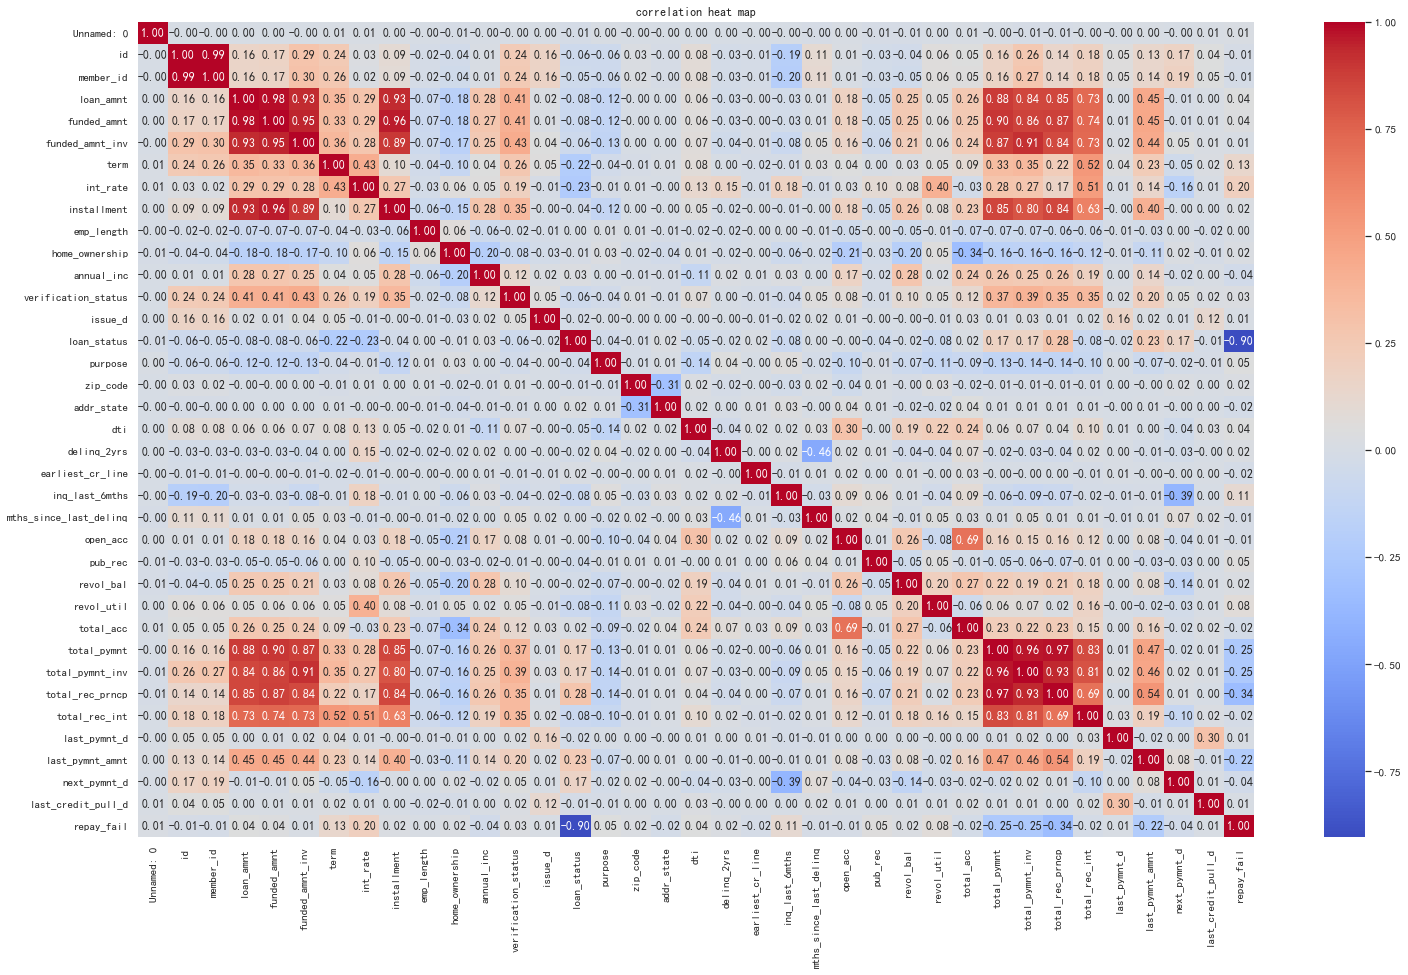

In [9]:
from sklearn.preprocessing import LabelEncoder

# Coding of categorical variables for correlation analysis
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Draw heat map
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('correlation heat map')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Selection of characteristics and target variables
features = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'total_acc', 'revol_bal', 'total_pymnt']
target = 'repay_fail'

# Prepare data
X = data[features]
y = data[target]

# Coding 'term' as it is a categorical variable,transform it into numeric type  
X['term'] = label_encoder.fit_transform(X['term'])

# Seperate data into train test sets.30% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a decision tree model
#Set 42 as random seed for reproducibility. Refer from The Hitchhiker’s Guide to the Galaxy
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Forecasting and evaluating models
#Use classfication_report to generate model's report.
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix

C:\Users\yhm99\AppData\Local\Temp/ipykernel_5284/351190103.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['term'] = label_encoder.fit_transform(X['term'])


('              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96      9776\n           1       0.79      0.79      0.79      1768\n\n    accuracy                           0.94     11544\n   macro avg       0.88      0.87      0.88     11544\nweighted avg       0.94      0.94      0.94     11544\n',
 array([[9413,  363],
        [ 377, 1391]], dtype=int64))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
# Initial model uses 5 neighbours , odd number to avoid ties

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Forecasting and evaluating models
y_pred_knn = knn.predict(X_test)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

report_knn, conf_matrix_knn

Accuracy: 0.917013167013167


('              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95      9776\n           1       0.89      0.53      0.66      1768\n\n    accuracy                           0.92     11544\n   macro avg       0.90      0.76      0.81     11544\nweighted avg       0.91      0.92      0.91     11544\n',
 array([[9656,  120],
        [ 838,  930]], dtype=int64))

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a random forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Forecasting and evaluating models
y_pred_rf = random_forest.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

report_rf, conf_matrix_rf

('              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97      9776\n           1       0.96      0.68      0.80      1768\n\n    accuracy                           0.95     11544\n   macro avg       0.95      0.84      0.88     11544\nweighted avg       0.95      0.95      0.94     11544\n',
 array([[9729,   47],
        [ 558, 1210]], dtype=int64))

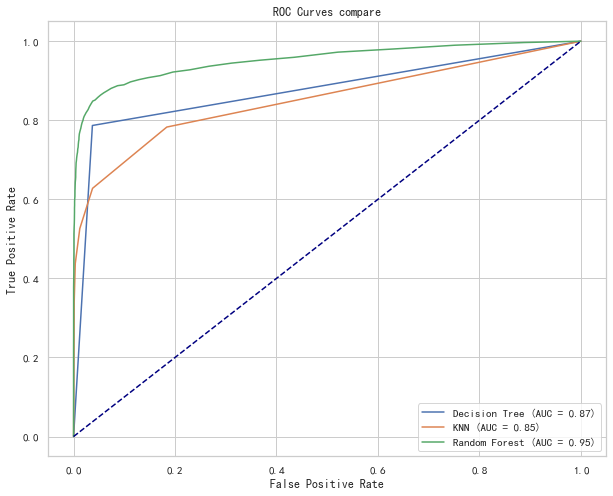

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Functions to calculate ROC AUC
def calculate_roc_auc(model, X_test, y_test):
    # predictive probability
    probs = model.predict_proba(X_test) 
    # Probability of retaining only positive categories
    probs = probs[:, 1]
    # Calculation of AUC
    auc_value = roc_auc_score(y_test, probs)
    #  Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    return fpr, tpr, auc_value

# Calculate ROC AUC for each model
fpr_dt, tpr_dt, auc_dt = calculate_roc_auc(decision_tree, X_test, y_test)
fpr_knn, tpr_knn, auc_knn = calculate_roc_auc(knn, X_test, y_test)
fpr_rf, tpr_rf, auc_rf = calculate_roc_auc(random_forest, X_test, y_test)

# Plotting ROC curves for all three models
plt.figure(figsize=(10, 8))

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves compare')
plt.legend(loc='lower right')
plt.show()

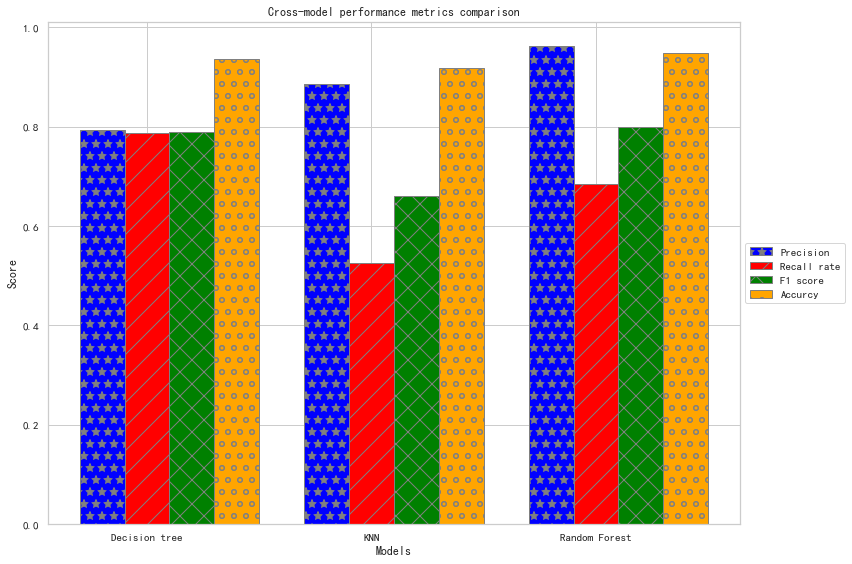

In [17]:
#  Function for extracting performance metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def extract_performance_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

# Extract performance metrics for each model
precision_dt, recall_dt, f1_dt, accuracy_dt = extract_performance_metrics(decision_tree, X_test, y_test)
precision_knn, recall_knn, f1_knn, accuracy_knn = extract_performance_metrics(knn, X_test, y_test)
precision_rf, recall_rf, f1_rf, accuracy_rf = extract_performance_metrics(random_forest, X_test, y_test)

# Data for mapping
models = ['Decision tree', 'KNN', 'Random Forest']
precisions = [precision_dt, precision_knn, precision_rf]
recalls = [recall_dt, recall_knn, recall_rf]
f1_scores = [f1_dt, f1_knn, f1_rf]
accuracies = [accuracy_dt, accuracy_knn, accuracy_rf]

# Plot
plt.figure(figsize=(12, 8))

bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precisions, color='blue', width=bar_width, edgecolor='grey', label='Precision', hatch='*')
plt.bar(r2, recalls, color='red', width=bar_width, edgecolor='grey', label='Recall rate', hatch='/')
plt.bar(r3, f1_scores, color='green', width=bar_width, edgecolor='grey', label='F1 score', hatch='x')
plt.bar(r4, accuracies, color='orange', width=bar_width, edgecolor='grey', label='Accurcy', hatch='o')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Score')
plt.title('Cross-model performance metrics comparison')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

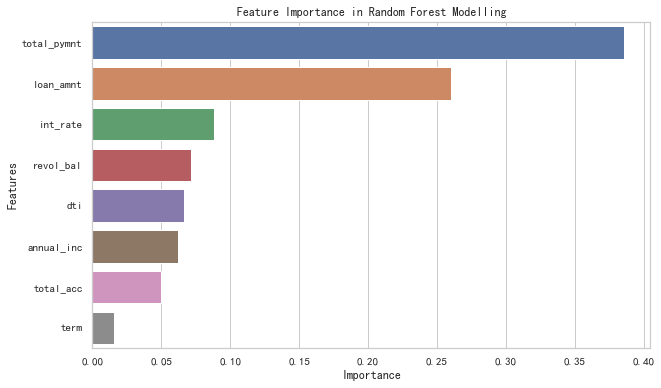

In [18]:
# Extracting feature importance from random forest models
feature_importances = random_forest.feature_importances_

# Creating a DataFrame for Visualisation
importances_df = pd.DataFrame({'Features': X.columns, 'Importance': feature_importances})

# Sorting DataFrames by Importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=importances_df)
plt.title('Feature Importance in Random Forest Modelling')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
